In [1]:
import pandas as pd
import plotly.express as px

In [19]:
df = pd.read_csv('prepared_congress_trading_dataset.csv')
print(df.head())

   Unnamed: 0 Ticker      Traded Transaction       Trade_Size_USD  \
0           0    NGL  2024-03-11        Sale    $15,001 - $50,000   
1           1    FCX  2024-02-29        Sale     $1,001 - $15,000   
2           2      V  2024-02-29    Purchase     $1,001 - $15,000   
3           3   AAPL  2024-02-29    Purchase            $1-$1,000   
4           4   MSFT  2024-02-29        Sale  $100,001 - $250,000   

               Name       Filed Party District Chamber       State  
0     Mark Dr Green  2024-03-13     R     TN07   House   Tennessee  
1   Josh Gottheimer  2024-03-07     D     NJ05   House  New Jersey  
2     Pete Sessions  2024-03-07     R     TX17   House       Texas  
3     Pete Sessions  2024-02-29     R     TX17   House       Texas  
4  Suzan K. Delbene  2024-03-08     D     WA01   House  Washington  


In [20]:
counts_df = df.groupby("State").size().reset_index(name="count")
print(counts_df.head())

        State  count
0     Alabama   1346
1      Alaska    118
2     Arizona    388
3    Arkansas     62
4  California   3639


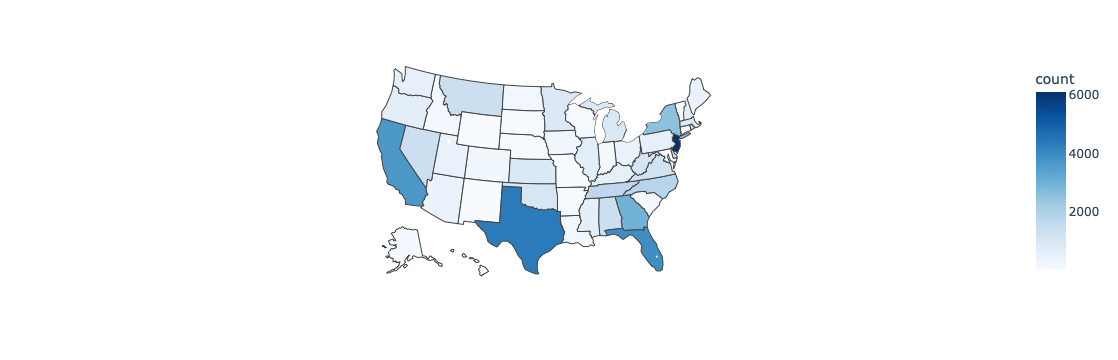

In [21]:
# map showcasing which states have most and least trading
us_state_abbrev = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
    'Colorado':'CO','Connecticut':'CT','Delaware':'DE','Florida':'FL','Georgia':'GA',
    'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS',
    'Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA',
    'Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO','Montana':'MT',
    'Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM',
    'New York':'NY','North Carolina':'NC','North Dakota':'ND','Ohio':'OH','Oklahoma':'OK',
    'Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC',
    'South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT',
    'Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}

df["State"] = df["State"].map(us_state_abbrev)

counts_df = df.groupby("State").size().reset_index(name="count")


px.choropleth(counts_df,locations="State",locationmode="USA-states",color="count",color_continuous_scale="Blues",scope="usa").show()

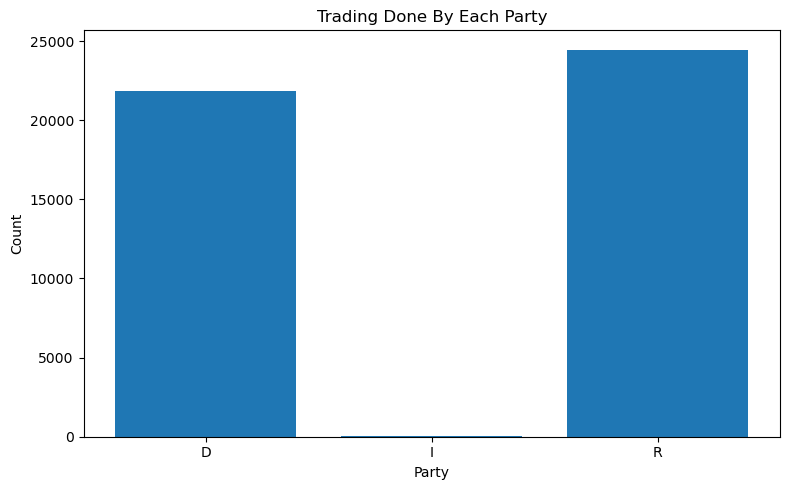

In [24]:
# showcasing possible class imbalance

counts_df_party = df.groupby("Party").size().reset_index(name="count")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(counts_df_party["Party"], counts_df_party["count"])
plt.xlabel("Party")
plt.ylabel("Count")
plt.title("Trading Done By Each Party")
plt.tight_layout()
plt.show()

In [25]:
def midpoint(range_str):
    clean = range_str.replace("$", "").replace(",", "")
    
    # Split on dash
    low, high = clean.split("-")
    
    # Convert to integers
    low = int(low.strip())
    high = int(high.strip())
    
    # Midpoint
    return (low + high) / 2


df["midpoint"] = df["Trade_Size_USD"].apply(midpoint)

In [31]:
state_sums = df.groupby("State")["midpoint"].sum().reset_index()

In [32]:
state_sums

,State,midpoint
0,AK,1798559.0
1,AL,33487173.0
2,AR,39084531.0
3,AZ,3251194.0
4,CA,174795819.5
5,CO,13098128.0
6,CT,1481573.5
7,DE,6785875.5
8,FL,61018944.5
9,GA,179707971.0


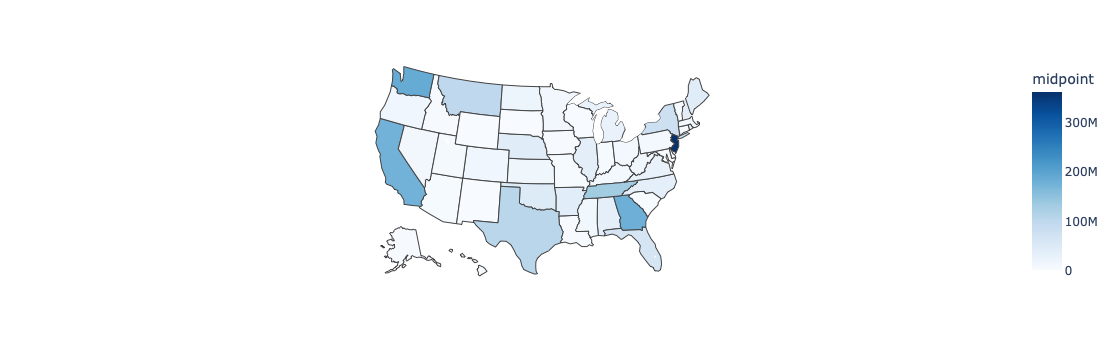

In [33]:
px.choropleth(state_sums,locations="State",locationmode="USA-states",color="midpoint",color_continuous_scale="Blues",scope="usa").show()